# Data Challenge 3

### We are asked to design a model to predict the conversion rate based on the location of the user, their age, how the got here, how many pages they visited on the website, and whether they are a new or existing customer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
indata = pd.read_csv('conversion_data.csv')
indata.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
indata.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [4]:
grouped = indata.groupby(['country', 'source'], as_index=False).mean()
grouped

,country,source,age,new_user,total_pages_visited,converted
0,China,Ads,30.650063,0.696628,4.563796,0.001484
1,China,Direct,30.598694,0.698677,4.527286,0.001374
2,China,Seo,30.720634,0.699532,4.559822,0.001224
3,Germany,Ads,30.318351,0.674468,5.231649,0.066755
4,Germany,Direct,30.443785,0.685056,5.113827,0.053422
5,Germany,Seo,30.529695,0.675373,5.201026,0.064055
6,UK,Ads,30.432978,0.681832,5.127238,0.055630
7,UK,Direct,30.441380,0.685563,4.991016,0.046267
8,UK,Seo,30.466829,0.676022,5.099198,0.053905
9,US,Ads,30.528787,0.682872,4.957897,0.040580


### Start making some exploratory plots.  It would be interesting to know at first pass, where in the world our customers are.

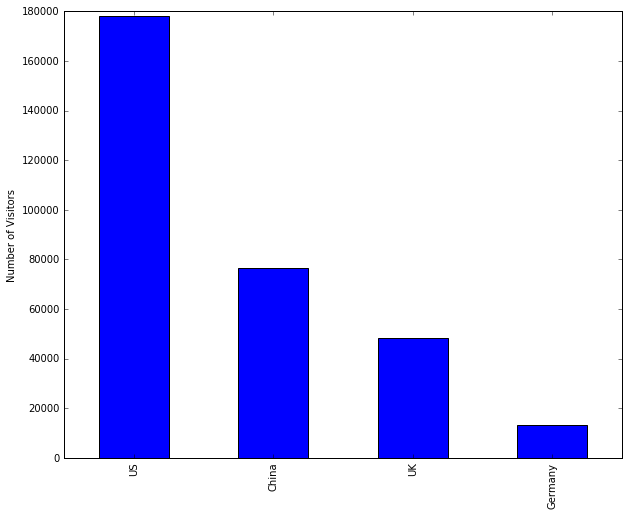

In [5]:
ax = indata.country.value_counts().plot(kind='bar', figsize=(10,8))
ax.set_ylabel('Number of Visitors')

## Most of our potential customers are in the US by a factor of two.  Next visualize the conversion rates.

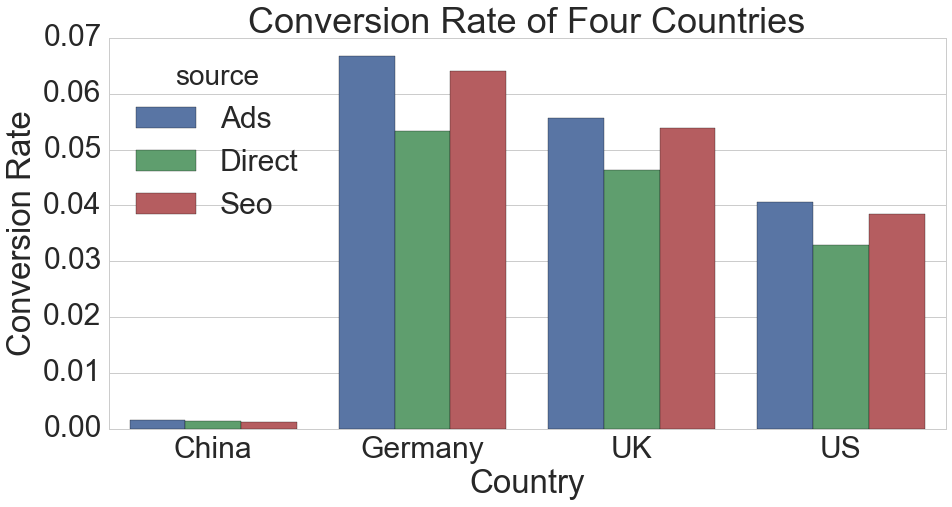

In [6]:
sns.set(font_scale=3)
sns.set_style("whitegrid")
fig, a = plt.subplots(figsize=(15,7),sharey=True)
sns.barplot(x='country', y= 'converted', hue = 'source',data = grouped)
a.set_xlabel('Country')
a.set_ylabel('Conversion Rate')
a.set_title('Conversion Rate of Four Countries')


In [7]:
Newgrouped = indata.groupby(['new_user', 'country'], as_index=False).mean()
Newgrouped

,new_user,country,age,total_pages_visited,converted
0,0,China,30.744436,4.579848,0.002858
1,0,Germany,30.286189,5.946369,0.139772
2,0,UK,30.231627,5.722731,0.114363
3,0,US,30.347747,5.394802,0.083551
4,1,China,30.642128,4.542162,0.000673
5,1,Germany,30.528048,4.830581,0.025673
6,1,UK,30.555104,4.780497,0.023559
7,1,US,30.668481,4.713493,0.016467


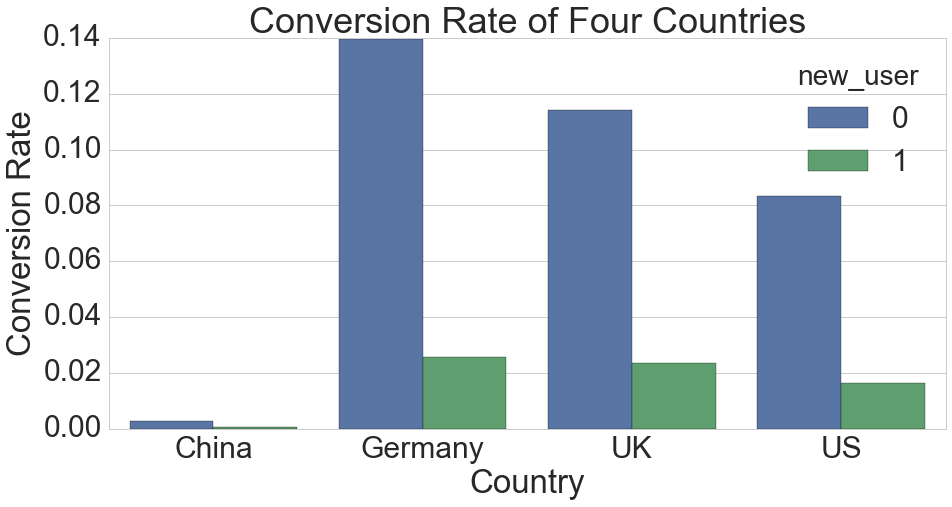

In [8]:
sns.set_style("whitegrid")
fig, a = plt.subplots(figsize=(15,7),sharey=True)
sns.barplot(x='country', y= 'converted', hue = 'new_user',data = Newgrouped)
a.set_xlabel('Country')
a.set_ylabel('Conversion Rate')
a.set_title('Conversion Rate of Four Countries')

## Clearly the conversion reate for China is much lower than for the other countries, This is going to probably turn out to be an important feature.  There is also a significant drop off in conversion the conversion rate for repeat visitors.  Advertising and Web Searches tend to lead to a higher conversion rate then direct traffic.  A customer that directly goes to a website without following an ad or a link has probably already been there before, so this is related to whether they are a repeat customer or not.  

## Let's see how the age of the customer is related to the conversion rate.  

In [9]:
agegrouped = indata.groupby(['age'], as_index=False).mean()
agegrouped.head()


,age,new_user,total_pages_visited,converted
0,17,0.667500,5.317362,0.071607
1,18,0.672336,5.184266,0.066029
2,19,0.675794,5.108996,0.058616
3,20,0.675266,5.129874,0.057109
4,21,0.679920,5.068028,0.053985


In [10]:
agegrouped.describe()


,age,new_user,total_pages_visited,converted
count,60.000000,60.000000,60.000000,60.000000
mean,48.066667,0.667600,4.950133,0.050583
std,21.315918,0.177486,1.618349,0.178802
min,17.000000,0.000000,1.000000,0.000000
25%,31.750000,0.671805,4.623833,0.000000
50%,46.500000,0.685649,4.737215,0.012362
75%,61.250000,0.699977,4.894598,0.029889
max,123.000000,1.000000,15.000000,1.000000


## A 123 year old doesn't sound very likely.  Obviously a data entry error.  Go ahead and drop these

In [11]:
indata = indata.loc[indata['age']<=100]
indata.describe()


,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


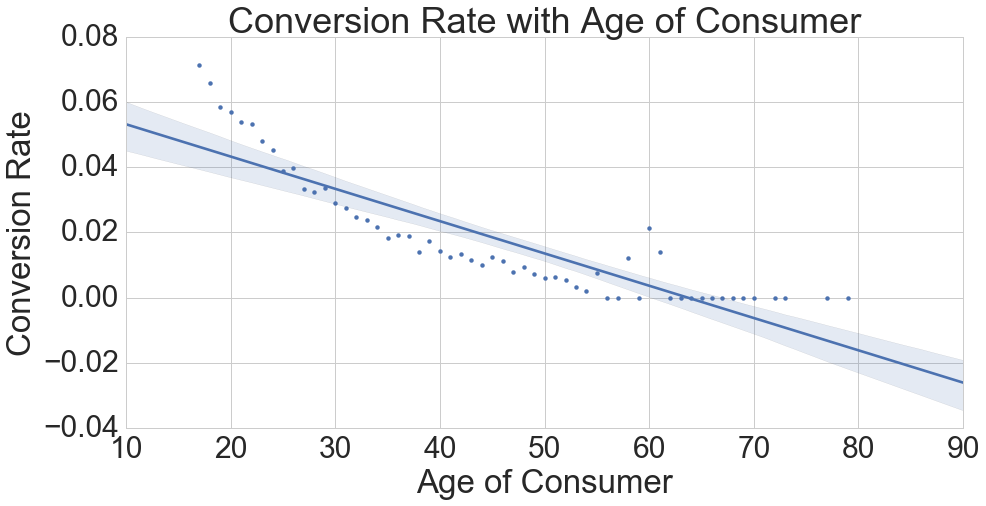

In [12]:
sns.set_palette('deep')
agegrouped = indata.groupby(['age'], as_index=False).mean()
fig, a = plt.subplots(figsize=(15,7),sharey=True)
sns.regplot('age', 'converted', data=agegrouped, scatter_kws={'alpha':1})
a.set_xlabel('Age of Consumer')
a.set_ylabel('Conversion Rate')
a.set_title('Conversion Rate with Age of Consumer')
#sns.set_style("whitegrid")



## Confirming once again that the 18-34 demographic is where your money is.

# A more interested customer is probably more likely to view multiple pages.  Take a look at conversion rate based on page views.

In [13]:
viewsgrouped = indata.groupby(['total_pages_visited'], as_index=False).mean()
viewsgrouped.head()


,total_pages_visited,age,new_user,converted
0,1,30.711701,0.703601,0.000000
1,2,30.701673,0.699188,0.000228
2,3,30.690251,0.699035,0.000251
3,4,30.729572,0.696730,0.000780
4,5,30.629476,0.694475,0.001570


(-0.2, 1.2)

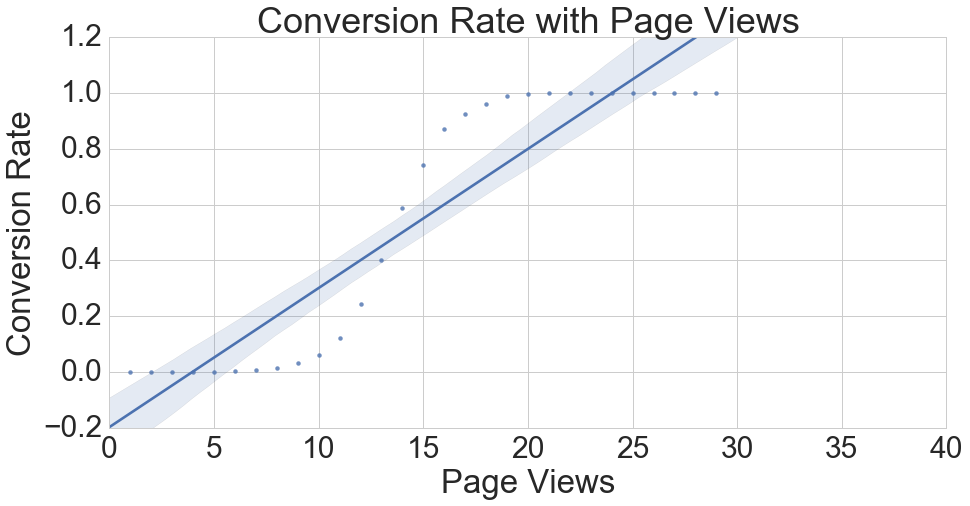

In [14]:
fig, a = plt.subplots(figsize=(15,7),sharey=True)
sns.set_palette('deep')
sns.regplot('total_pages_visited', 'converted', data=viewsgrouped)
sns.set_style("whitegrid")
a.set_xlabel('Page Views')
a.set_ylabel('Conversion Rate')
a.set_title('Conversion Rate with Page Views')
plt.xlim(0,40)
plt.ylim(-0.2,1.2)


# 50% conversion happens at about 14 site views.

#  We've been asked to come up with a model that will predict the conversion rate.  A Random Forest is well suited for this task.  

In [15]:
#Make the country and source into a numeric variable with dummies.
countries = pd.get_dummies(indata['country'])
sources = pd.get_dummies(indata['source'])

In [16]:
indata = pd.concat([indata, countries], axis=1)

In [17]:
indata = pd.concat([indata, sources], axis=1)
indata.head()

,country,age,new_user,source,total_pages_visited,converted,China,Germany,UK,US,Ads,Direct,Seo
0,UK,25,1,Ads,1,0,0,0,1,0,1,0,0
1,US,23,1,Seo,5,0,0,0,0,1,0,0,1
2,US,28,1,Seo,4,0,0,0,0,1,0,0,1
3,China,39,1,Seo,5,0,1,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,0,1,0,0,1


## Because the data are highly imbalanced (conversion rates are quite low), I'm going to need to resample the data.  

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
smite = SMOTE(ratio = 'auto', kind = 'regular', random_state = 1776)
x = indata.drop(['country', 'source', 'converted'], axis=1).values
y = indata['converted'].values
sx, sy = smite.fit_sample(x,y)
#split into test and training sets
X_train, X_test, Y_train, Y_test  = train_test_split(sx, sy, test_size= 0.3, random_state = 1985)

In [19]:
clf = RandomForestClassifier(n_estimators=1000,n_jobs=4, 
                             random_state=1979, oob_score=True, 
                             max_depth=3, verbose=True)
clf.fit(X_train, Y_train)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   35.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:  1.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=4,
            oob_score=True, random_state=1979, verbose=True,
            warm_start=False)

In [20]:
test_pred = clf.predict(X_test)
conmat = confusion_matrix(Y_test, test_pred)
conmat

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.0s finished


array([[86614,  5088],
       [ 4888, 87010]])

In [21]:
accuracy_score(Y_test, test_pred, normalize=True)

0.94566448801742919

In [22]:
#since binary classification, get the F-score
f1_score(Y_test, test_pred)

0.94578143003108761

## Take a look at feature importance

In [23]:
importances = clf.feature_importances_


In [24]:
importances

array([  3.62429443e-02,   1.93582947e-01,   6.25923364e-01,
         1.21180278e-01,   2.44880453e-03,   7.70661914e-03,
         1.25328857e-02,   9.58168573e-06,   3.31386945e-04,
         4.11886067e-05])

In [25]:
print np.sum(importances)

1.0


In [26]:
labels = list(indata.drop(['country', 'source', 'converted'], axis=1))

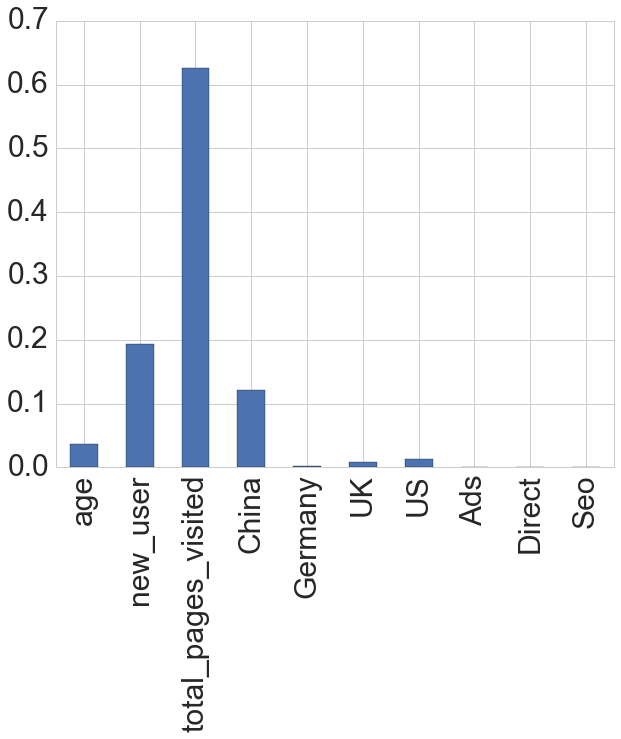

In [27]:
feature_imp_frame = pd.DataFrame(index=labels, data = importances)
feature_imp_frame = feature_imp_frame.T
row= feature_imp_frame.iloc[0]
row.plot(kind='bar', figsize=(10,8))

# The most impactful features are the Total number of pages, whether the user is a repeat customer, the age of the user and whther the user is in China or not.  

# New users convert at a much higher rate than existing users.  Young people are also much more likely to convert than older users.  Chinese users are less likely to convert than users in the US or Europe.  

# Since users that explore the website more thouroughly are more likely to convert, I would suggest finding ways to make the website more engaging in order to keep users interacting with it longer.  I would also suggest increasing advertising to European users, because the conversion rates from the two European countries for which we have data is high.  There is also an opportunity for growth in the Chinese market, but those users currently have a low conversion rate.  Looking into why that is the case is reccomended.  